<a href="https://colab.research.google.com/github/rayeeed/dsps24_Roadrunner1/blob/main/DSPS24_nb2_newDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *
import pandas as pd

# Load the data
df = pd.read_csv('/content/drive/MyDrive/DSPS24/new_dataset/train/train.csv')

# Define the path to the folder containing the images
path = Path('/content/drive/MyDrive/DSPS24/new_dataset/train/train')


In [ ]:
len(df)

7702

In [ ]:
# Filter rows with PCI less than zero
df_filtered = df[df['pci'] >= 0]

# Get the list of image names to remove
image_names_to_remove = df[~df.index.isin(df_filtered.index)]['image_name']


# Define the path to the folder containing the images
original_path = Path('/content/drive/MyDrive/DSPS24/new_dataset/train/train')
backup_path = Path('/content/drive/MyDrive/DSPS24/new_dataset/train/train_backup')  # Create a backup directory

# Create the backup directory if it doesn't exist
backup_path.mkdir(parents=True, exist_ok=True)

# Move the corresponding image files to the backup directory
for image_name in image_names_to_remove:
    original_image_path = original_path / image_name
    backup_image_path = backup_path / image_name
    if original_image_path.exists():
        os.rename(original_image_path, backup_image_path)
        print(f"Moved {image_name} to the backup directory.")

# Update the dataframe (if needed)
df = df_filtered

In [ ]:
len(df)

7685

In [ ]:
fns = get_image_files(path)
len(fns)

7685

In [ ]:
failed = verify_images(fns)

In [ ]:
failed

(#2) [Path('/content/drive/MyDrive/DSPS24/new_dataset/train/train/1119_(40.7034233333333, -89.4052588333333)_ 2023-10-18 15-49-01_14.30605_D.jpg'),Path('/content/drive/MyDrive/DSPS24/new_dataset/train/train/11980_(40.6916493333333, -89.4393206666667)_ 2023-10-20 16-10-54_28.5085_D.jpg')]

In [ ]:
failed.map(Path.unlink)

(#2) [None,None]

In [ ]:
# Define the data block
dblock = DataBlock(blocks=(ImageBlock, RegressionBlock),
                   get_x=ColReader('image_name', pref=path),
                   get_y=ColReader('pci'),
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms=RandomResizedCrop(512, min_scale=0.7),
                   batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)])

# Create the dataloader
dls = dblock.dataloaders(df, batch_size=32)

# **resnet**

In [ ]:
# Create the learner
learn = vision_learner(dls, resnet18, metrics=mae, cbs=[EarlyStoppingCallback(patience=2), SaveModelCallback(every_epoch=True,fname='/content/drive/MyDrive/DSPS24/new_dataset/models/resnet18_model')],y_range=(-0.5,100.5))

# Train the model
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 96.2MB/s]


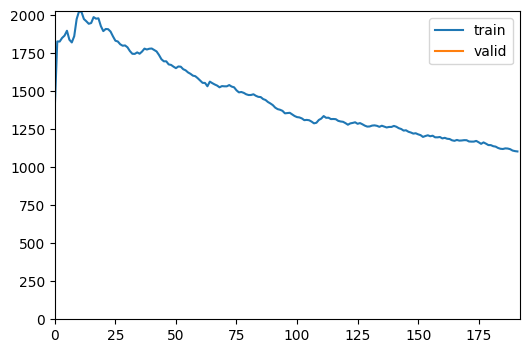

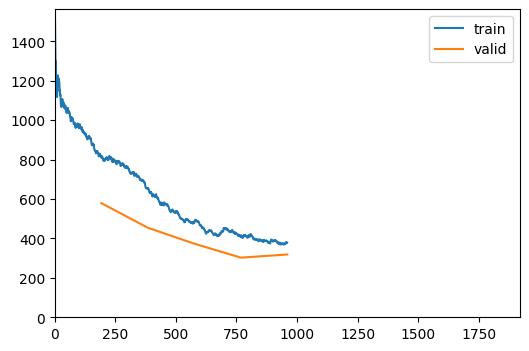

No improvement since epoch 3: early stopping


In [ ]:
# Create the learner
learn = vision_learner(dls, resnet34, metrics=mae, cbs=[EarlyStoppingCallback(patience=2), ShowGraphCallback(),SaveModelCallback(every_epoch=True,fname='/content/drive/MyDrive/DSPS24/new_dataset/models/resnet34_model')],y_range=(-0.5,100.5))

# Train the model
learn.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


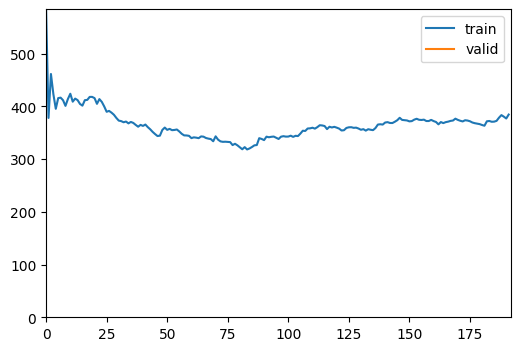

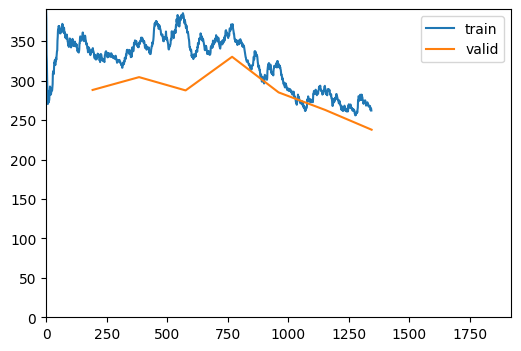

In [ ]:
# Create the learner
learn = vision_learner(dls, resnet34, metrics=mae, cbs=[EarlyStoppingCallback(patience=3), ShowGraphCallback(),SaveModelCallback(every_epoch=True,fname='/content/drive/MyDrive/DSPS24/new_dataset/models/resnet34_model')],y_range=(-0.5,100.5))
learn=learn.load('/content/drive/MyDrive/DSPS24/new_dataset/models/resnet34_model_3')
# Train the model
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 141MB/s]
/usr/local/lib/python3.10/dist-packages/fastai/learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


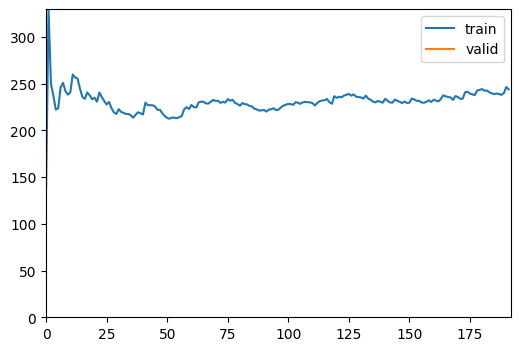

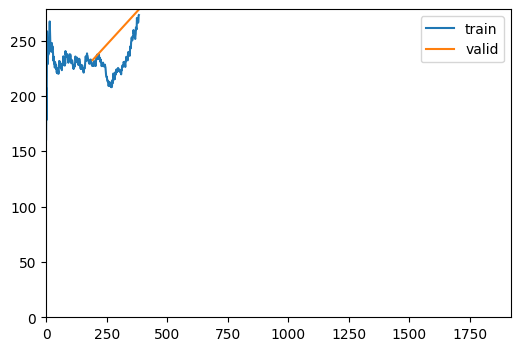

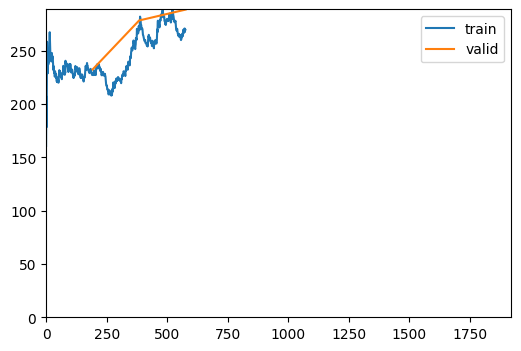

No improvement since epoch 0: early stopping


In [ ]:
# Create the learner
learn = vision_learner(dls, resnet34, metrics=mae, cbs=[EarlyStoppingCallback(patience=3), ShowGraphCallback(),SaveModelCallback(every_epoch=True,fname='/content/drive/MyDrive/DSPS24/new_dataset/models/resnet34_model')],y_range=(-0.5,100.5))
learn=learn.load('/content/drive/MyDrive/DSPS24/new_dataset/models/resnet34_model_6')
# Train the model
learn.fine_tune(10)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=mae, cbs=[EarlyStoppingCallback(patience=3), ShowGraphCallback(),SaveModelCallback(every_epoch=True,fname='/content/drive/MyDrive/DSPS24/new_dataset/models/resnet34_model')],y_range=(-0.5,100.5))
learn=learn.load('/content/drive/MyDrive/DSPS24/new_dataset/models/resnet34_model_0')

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 149MB/s]
/usr/local/lib/python3.10/dist-packages/fastai/learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


In [7]:
## use gdown in google collab to download the test data.
## if gdown fails, click on output link from gdown to download data directly from browser

!gdown --id '1KdNjCIot9SYh9JxRHuCjrPdmgUDazZ9U'

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1KdNjCIot9SYh9JxRHuCjrPdmgUDazZ9U
From (redirected): https://drive.google.com/uc?id=1KdNjCIot9SYh9JxRHuCjrPdmgUDazZ9U&confirm=t&uuid=b004ab64-a660-42e2-b160-bde99b61a700
To: /content/test.zip
100% 2.92G/2.92G [00:39<00:00, 74.7MB/s]


In [11]:
## use unzip in google collab to extract zipped training data to current directory.
!unzip '/content/test.zip' -d './'

Archive:  /content/test.zip
   creating: ./test/
  inflating: ./test/3910_[40.70800769388502, -89.38938456054692]_ 2023-10-18 16-18-59_22.8697_LD.jpg  
  inflating: ./test/6780_(40.7029723333333, -89.4051231666667)_ 2023-10-18 17-02-15_4.22725_D.jpg  
  inflating: ./test/1101_(40.7033468333333, -89.40616)_ 2023-10-18 15-48-47_16.61855_D.jpg  
  inflating: ./test/20513_(40.7089811666667, -89.4348416666667)_ 2023-10-20 19-10-05_2.42905_D.jpg  
  inflating: ./test/40399_[40.71426820356199, -89.43796371571018]_ 2023-10-20 15-30-41_16.81465_LD.jpg  
  inflating: ./test/46049_(40.7022096666667, -89.4174218333333)_ 2023-10-20 19-53-28_33.02435_D.jpg  
  inflating: ./test/13181_(40.6990283333333, -89.4438793333334)_ 2023-10-20 16-23-39_27.63715_D.jpg  
  inflating: ./test/9211_(40.7292421666667, -89.4384211666667)_ 2023-10-18 20-17-08_25.84265_D.jpg  
  inflating: ./test/32770_[40.7163773348367, -89.41645742478786]_ 2023-10-18 19-10-20_22.4405_LD.jpg  
  inflating: ./test/38808_[40.72804633333

In [18]:
test_path = Path('/content/test')
rows = []
for tst_img in test_path.glob('**/*.jpg'):
    preds = learn.predict(tst_img)
    pred_value = preds[0] # Extract the predicted value from the tuple
    rows.append({'image_name': os.path.basename(tst_img),
                 'pci': pred_value})

df_test = pd.DataFrame(rows)


OSError: image file is truncated (51 bytes not processed)

In [20]:
rows

[{'image_name': '22012_(40.711165, -89.4175438333333)_ 2023-10-20 19-25-31_38.05265_D.jpg',
  'pci': (50.81731033325195)},
 {'image_name': '41746_[40.70614007472357, -89.46156310588547]_ 2023-10-20 16-41-33_43.72845_LD.jpg',
  'pci': (89.54842376708984)},
 {'image_name': '49828_(40.7251871666667, -89.450205)_ 2023-10-18 20-44-13_41.62315_D.jpg',
  'pci': (83.240966796875)},
 {'image_name': '41745_(40.7061928333333, -89.4615401666667)_ 2023-10-20 16-41-33_42.7535_D.jpg',
  'pci': (72.97431945800781)},
 {'image_name': '10182_[40.72264570485108, -89.43713733540167]_ 2023-10-18 20-26-26_36.0972_LD.jpg',
  'pci': (45.034767150878906)},
 {'image_name': '19616_(40.7051068333333, -89.445311)_ 2023-10-20 19-00-55_25.50965_D.jpg',
  'pci': (2.6074228286743164)},
 {'image_name': '16218_[40.69515830276954, -89.4836795817025]_ 2023-10-20 17-29-30_45.90775_LD.jpg',
  'pci': (50.37297821044922)},
 {'image_name': '5357_[40.70442358493407, -89.39374919306383]_ 2023-10-18 16-34-03_35.4682_LD.jpg',
  'pc

In [19]:
fns_test = get_image_files('/content/test')
len(fns_test)
failed_test = verify_images(fns_test)

In [26]:
failed_test

(#1) [Path('/content/test/13143_(40.6993196666667, -89.4439158333333)_ 2023-10-20 16-23-15_28.2717_D.jpg')]

In [25]:
failed_test.map(test_path.unlink)

IsADirectoryError: [Errno 21] Is a directory: '/content/test'

In [27]:
test_path = Path('/content/test')
rows = []
for tst_img in test_path.glob('**/*.jpg'):
    try:
        preds = learn.predict(tst_img)
        pred_value = preds[0]  # Extract the predicted value from the tuple
        rows.append({'image_name': os.path.basename(tst_img),
                     'pci': pred_value})
    except OSError as e:
        print(f"Skipping image {tst_img}: {e}")

df_test = pd.DataFrame(rows)


Skipping image /content/test/13143_(40.6993196666667, -89.4439158333333)_ 2023-10-20 16-23-15_28.2717_D.jpg: image file is truncated (51 bytes not processed)


In [28]:
import json
# df: should have two columns - image_name and PCI
def gen_submit(df):
  out_json = []
  for idx, results in df.iterrows():
    out_json.append({results['image_name']:results['pci']})
  with open('submission.json', 'w') as f:
    json.dump(out_json, f)

In [30]:

gen_submit(df_test)

In [31]:
fns_test = get_image_files('/content/drive/MyDrive/DSPS24/new_dataset/test/test')

failed_test = verify_images(fns_test)

failed_test

(#1) [Path('/content/drive/MyDrive/DSPS24/new_dataset/test/test/13143_(40.6993196666667, -89.4439158333333)_ 2023-10-20 16-23-15_28.2717_D.jpg')]

# **xresnet**

Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /root/.cache/torch/hub/checkpoints/xrn50_940.pth
100%|██████████| 244M/244M [00:04<00:00, 58.3MB/s]


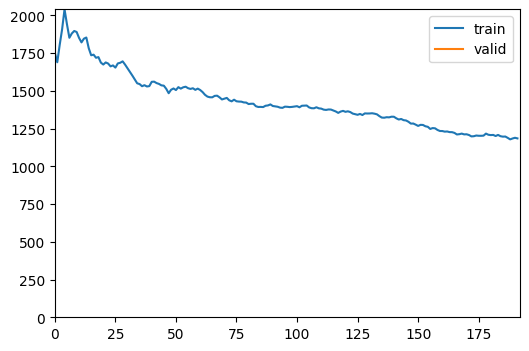

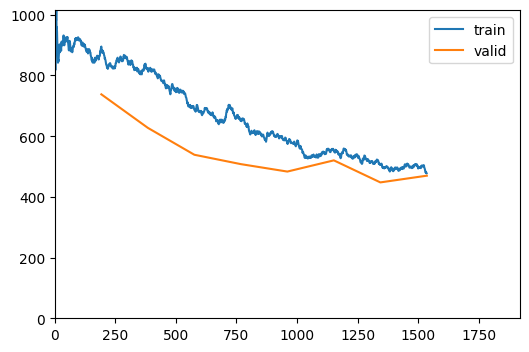

In [ ]:
# Create the learner
learn = vision_learner(dls, xresnet34, metrics=mae, cbs=[EarlyStoppingCallback(patience=2), ShowGraphCallback(),SaveModelCallback(every_epoch=True,fname='/content/drive/MyDrive/DSPS24/new_dataset/models/xresnet34_model')],y_range=(-0.5,100.5))

# Train the model
learn.fine_tune(10)

# **Alexnet**

In [ ]:
# Create the learner
learn = vision_learner(dls, alexnet, metrics=mae, cbs=[EarlyStoppingCallback(patience=2), SaveModelCallback(every_epoch=True)],y_range=(-0.5,100.5))

# Train the model
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 93.8MB/s]


In [ ]:
# Create the learner
learn = vision_learner(dls, alexnet, metrics=mae, cbs=[EarlyStoppingCallback(patience=2), SaveModelCallback(every_epoch=True,fname='/content/drive/MyDrive/DSPS24/alexnet_model')],y_range=(-0.5,100.5))
learn=learn.load('/content/models/model_4')
# Train the model
learn.fine_tune(5)

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


No improvement since epoch 0: early stopping


# **squeezenet**

In [ ]:
# Create the learner
learn = vision_learner(dls, squeezenet1_0, metrics=mae, cbs=[EarlyStoppingCallback(patience=2), SaveModelCallback(every_epoch=True,fname='/content/drive/MyDrive/DSPS24/squeezenet1_0')],y_range=(-0.5,100.5))

# Train the model
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth
100%|██████████| 4.78M/4.78M [00:00<00:00, 50.6MB/s]


In [ ]:
# Create the learner
learn = vision_learner(dls, squeezenet1_0, metrics=mae, cbs=[EarlyStoppingCallback(patience=3), SaveModelCallback(every_epoch=True,fname='/content/drive/MyDrive/DSPS24/squeezenet1_0')],y_range=(-0.5,100.5))
learn=learn.load('/content/drive/MyDrive/DSPS24/squeezenet1_0_4')

# Train the model for two more epochs
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth
100%|██████████| 4.78M/4.78M [00:00<00:00, 144MB/s]
/usr/local/lib/python3.10/dist-packages/fastai/learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


No improvement since epoch 0: early stopping
